In [ ]:
from keras.utils import np_utils
from keras.models                 import Sequential
from keras.layers                 import Dense, Activation, BatchNormalization, Dropout, LSTM
from tensorflow.keras.optimizers  import RMSprop, SGD
from keras.layers                 import Conv2D
from keras.layers                 import MaxPooling2D
from keras.layers                 import Flatten
from keras.callbacks              import EarlyStopping 
from keras.utils.np_utils import to_categorical
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x_train = []
x_test = []
y_train = []
y_test = []

for train in glob.glob("/content/drive/MyDrive/FaceDetection/Train/*.bmp"):
  a = cv2.imread(train)
  x_train.append(a)
  train1 = 'TruongHuy'
  train2 = 'VanBinh'
  train3 = 'TuanKhanh'
  if train1 in train:
    y_train.append([0])
  elif train2 in train:
    y_train.append([1])
  elif train3 in train:
    y_train.append([2])
x_train = np.array(x_train)
y_train = np.array(y_train)

for test in glob.glob("/content/drive/MyDrive/FaceDetection/Validation/*.bmp"):
  b = cv2.imread(test)
  x_test.append(b)
  test1 = 'TruongHuy'
  test2 = 'VanBinh'
  test3 = 'TuanKhanh'
  if test1 in test:
    y_test.append([0])
  elif test2 in test:
    y_test.append([1])
  elif test3 in test:
    y_test.append([2])
x_test = np.array(x_test)
y_test = np.array(y_test)


In [ ]:
x_train.shape

(420, 150, 150, 3)

In [ ]:
x_test.shape

(44, 150, 150, 3)

In [ ]:
y_train.shape

(420, 1)

In [ ]:
y_test.shape

(44, 1)

[1]


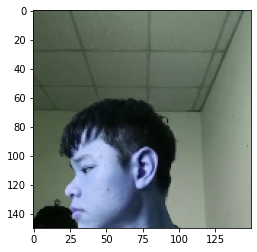

In [ ]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[40])
# print(y_train[40])
plt.imshow(x_test[24])
print(y_test[24])

In [ ]:
x_train = x_train.reshape(420, 150,150,3)
x_test = x_test.reshape(44, 150,150,3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same',input_shape = (150,150,3,)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
opt=SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1,validation_data=(x_test,y_test))
model.save('final_model.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
7/7 [==============================] - 13s 191ms/step - loss: 1.6322 - accuracy: 0.5000 - val_loss: 0.3573 - val_accuracy: 0.9545
Epoch 2/20
7/7 [==============================] - 0s 56ms/step - loss: 0.1701 - accuracy: 0.9738 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 3/20
7/7 [==============================] - 0s 55ms/step - loss: 0.0657 - accuracy: 0.9833 - val_loss: 0.4499 - val_accuracy: 0.7955
Epoch 4/20
7/7 [==============================] - 0s 55ms/step - loss: 0.2762 - accuracy: 0.9381 - val_loss: 0.0394 - val_accuracy: 1.0000
Epoch 5/20
7/7 [==============================] - 0s 54ms/step - loss: 0.0297 - accuracy: 0.9857 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 6/20
7/7 [==============================] - 0s 53ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 7/20
7/7 [==============================] - 0s 56ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 9.2136e-04 - val_accuracy: 1.0000
Epoch 8/20
7/7 [=====

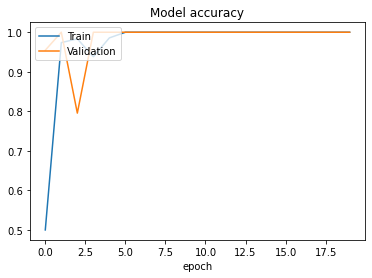

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Giá trị dự đoán: 2


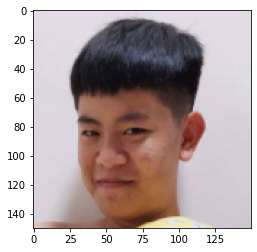

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

img = load_img('test.png', target_size=(150, 150))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1, 150,150,3)
img = img.astype('float32')
img = img / 255.0


# load model
model_final = load_model('final_model.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()